In [ ]:
from learntools.computer_vision.visiontools import edge, blur, bottom_sobel, emboss, sharpen, circle

image_dir = '../input/computer-vision-resources/'
circle_64 = tf.expand_dims(circle([64, 64], val=1.0, r_shrink=4), axis=-1)
kaggle_k = visiontools.read_image(image_dir + str('k.jpg'), channels=1)
car = visiontools.read_image(image_dir + str('car_illus.jpg'), channels=1)
car = tf.image.resize(car, size=[200, 200])
images = [(circle_64, "circle_64"), (kaggle_k, "kaggle_k"), (car, "car")]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img))
    plt.axis('off')
    plt.title(title)
plt.show();

kernels = [(edge, "edge"), (blur, "blur"), (bottom_sobel, "bottom_sobel"),
           (emboss, "emboss"), (sharpen, "sharpen")]
plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    visiontools.show_kernel(krn, digits=2, text_size=20)
    plt.title(title)
plt.show()

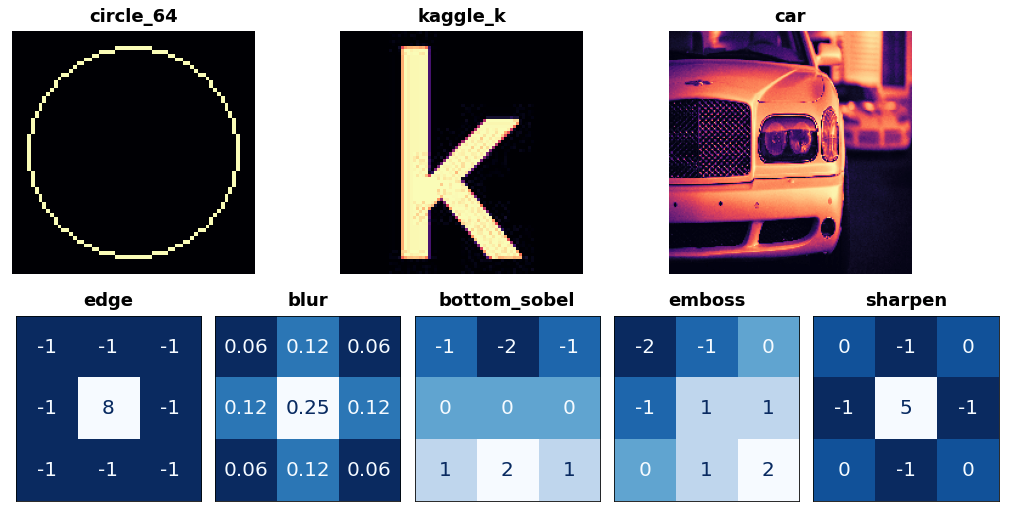

In [ ]:
image = kaggle_k

kernel = bottom_sobel

visiontools.show_extraction(
    image, kernel,

    conv_stride=1,
    conv_padding='valid',
    pool_size=1,
    pool_stride=4,
    pool_padding='same',
    
    subplot_shape=(1, 4),
    figsize=(14, 6),
)

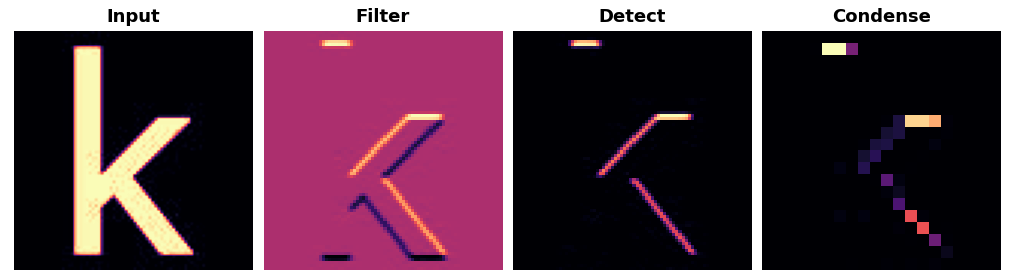

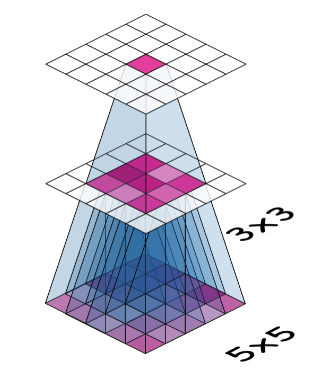

In [ ]:
import pandas as pd

# Load the time series as a Pandas dataframe
machinelearning = pd.read_csv(
    '../input/computer-vision-resources/machinelearning.csv',
    parse_dates=['Week'],
    index_col='Week',
)

machinelearning.plot();

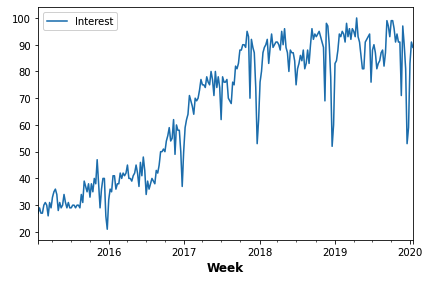

In [ ]:
detrend = tf.constant([-1, 1], dtype=tf.float32)

average = tf.constant([0.2, 0.2, 0.2, 0.2, 0.2], dtype=tf.float32)

spencer = tf.constant([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], dtype=tf.float32) / 320

In [ ]:
# UNCOMMENT ONE
# kernel = detrend
# kernel = average
kernel = spencer

# Reformat for TensorFlow
ts_data = machinelearning.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
machinelearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

machinelearning_filtered.plot();

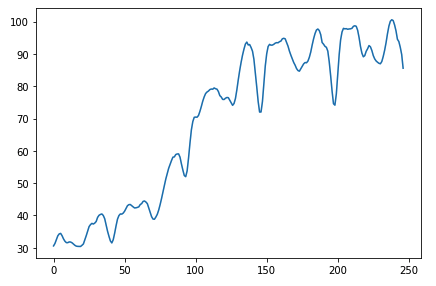